# Network visualization
This notebook assumes that you locally have the files obtained after running from a terminal inside `code`: 
```bash
python3 main.py -b 1.5 -d 1 -v 1
```
The default visualizations shows the results for $\beta=1.5$.

In [1]:
import os
import pickle
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

### Visualization setting 

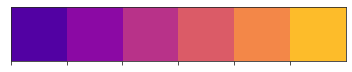

In [3]:
# color palette
sns.set_style("ticks")
sns.set_palette("plasma")
sns.palplot(sns.color_palette("plasma"))

# global font plots
plt.rcParams["font.family"] = "Computer Modern"

# global text format
matplotlib.rc('text', usetex=True)

# lightening color
def brightness_color(color, amount=0.5): # arg > 1 for darkening
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

# inch to cm
def cm2inch(value):
    return value/2.54


### I/O folders

In [7]:
path = os.getcwd() + "/"
output_path = path + "../data/output/"
input_path = path + "../data/input/"

### Import data

In [8]:
graph_dyn = nx.read_gpickle(output_path + "graph_dynamics_dyn.gpickle")
graph_opt = nx.read_gpickle(output_path +"graph_dynamics_opt.gpickle")

paris_nodes = pd.read_csv(input_path+'paris_nodes.csv',header=None)
node_labels = pd.Series(paris_nodes[1].values,index=paris_nodes[0]).to_dict()


In [9]:
with open(input_path + "comm_list.pkl",'rb') as comm_list_f:
    comm_list = pickle.load(comm_list_f)

with open(output_path + "flux_norm_dyn.pkl",'rb') as flux_mcot_f:
    flux_norm_dyn = pickle.load(flux_mcot_f)
    
with open(output_path + "flux_norm_opt.pkl",'rb') as flux_mcot_f:
    flux_norm_opt = pickle.load(flux_mcot_f)
    
with open(output_path + "length_edges_dyn.pkl",'rb') as length_mcot_f:
    length_dyn = pickle.load(length_mcot_f)
    
with open(output_path + "length_edges_opt.pkl",'rb') as length_mcot_f:
    length_opt = pickle.load(length_mcot_f)
     
with open(input_path + "forcing.pkl",'rb') as forcing_f:
    forcing = pickle.load(forcing_f)

try:
    with open(input_path + 'rhs.dat','r') as rhs_mcot:
        lines = rhs_mcot.readlines()
        for line in lines:
            entering_mass.append(float(line.strip().split(" ")[1]))
except:
    print("Insert rhs file name: \n default for Paris Metro: rhs.dat \n default for -topol=0: rhs_generated.dat")
    rhs_filename = input()
    entering_mass = []
    with open(input_path + rhs_filename,'r') as rhs_mcot:
        lines = rhs_mcot.readlines()
        for line in lines:
            entering_mass.append(float(line.strip().split(" ")[1]))

### Calculate useful quantities

In [10]:
transit_list_dyn = [node for node in graph_dyn.nodes if node not in comm_list]
transit_list_opt = [node for node in graph_opt.nodes if node not in comm_list]

norm_mass = max(entering_mass)
norm_flux_dyn = max(flux_norm_dyn)
norm_flux_opt = max(flux_norm_opt)

pos_dyn = nx.get_node_attributes(graph_dyn,'pos')
pos_opt = nx.get_node_attributes(graph_opt,'pos')

node_prop = 100
node_sizes = node_prop*np.array(entering_mass)/norm_mass

In [11]:
hubs = ['saint lazare','gare de lyon', 'chatelet', 'gare du nord']
# hubs = ['Gare de Lyon','Gare du Nord', 'Saint-Lazare','Châtelet']
hubs_label = {}
node_size_hubs = []
nodes = list(graph_opt.nodes)
for u in nodes:
    if node_labels[u] in hubs:
        hubs_label[u] = node_labels[u]
        node_size_hubs.append(node_sizes[u]) 
#         print(u,hubs_label[u],node_sizes[u])


# Dynamics converged and trimmed network

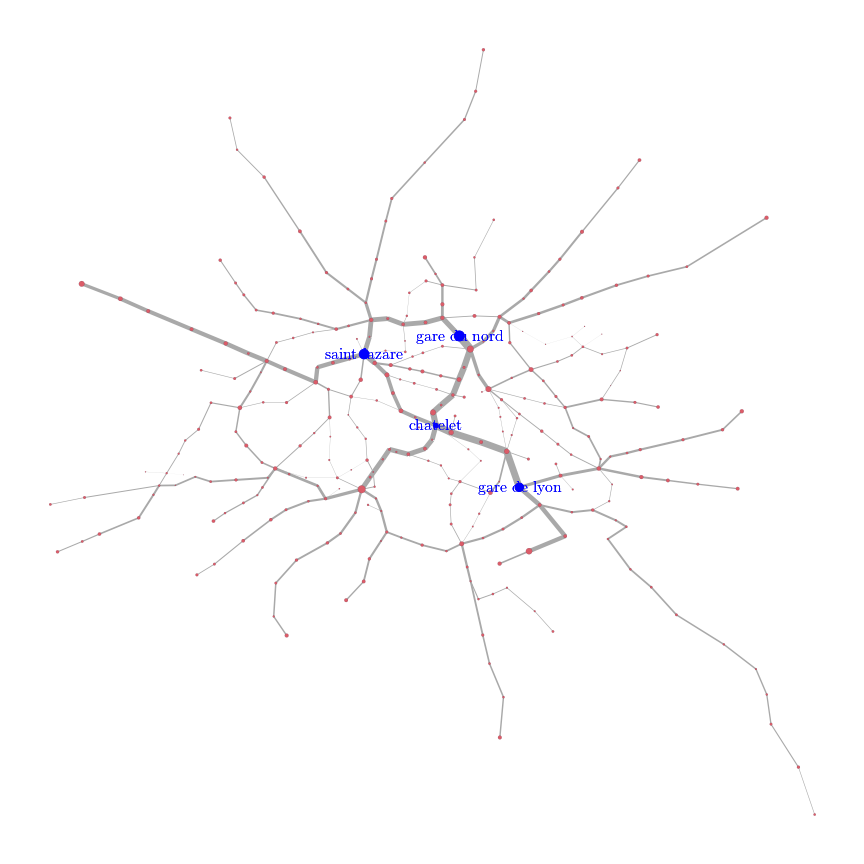

In [12]:
fig, ax = plt.subplots(1,1, figsize = (cm2inch(30),cm2inch(30)))

width_prop = 8

sns.despine(bottom = True, top = True, left = True, right = True)
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)

nx.draw_networkx_edges(graph_dyn,
                       pos = pos_dyn,
                       width=width_prop*flux_norm_dyn/norm_flux_dyn,
                       edge_color='darkgray',
                       style='solid')
node_tran = nx.draw_networkx_nodes(graph_dyn,
                                   pos = pos_dyn,
                                   nodelist = transit_list_dyn,
                                   node_shape='o',
                                   node_color = 'C2',
                                   node_size = 5,
                                   linewidths = 0.1)
node_comm = nx.draw_networkx_nodes(graph_dyn,
                                   pos = pos_dyn,
                                   nodelist = comm_list,
                                   node_shape='o',
                                   node_color = 'C3',
                                   node_size = node_sizes,
                                   linewidths = 0.1)

nx.draw_networkx_labels(graph_dyn,pos_dyn,hubs_label,font_size=16,font_color='b')
nx.draw_networkx_labels(graph_dyn,pos_dyn,hubs_label,font_size=16,font_color='b')
nx.draw_networkx_nodes(graph_dyn,pos = pos_dyn,nodelist = list(hubs_label.keys()),node_shape='o',node_color = 'b',
                                   node_size = node_size_hubs)

if node_tran:
    node_tran.set_edgecolor(brightness_color('C0', 1.4))
node_comm.set_edgecolor(brightness_color('C1', 1.4))

plt.show(True)

# Optimization converged and trimmed network

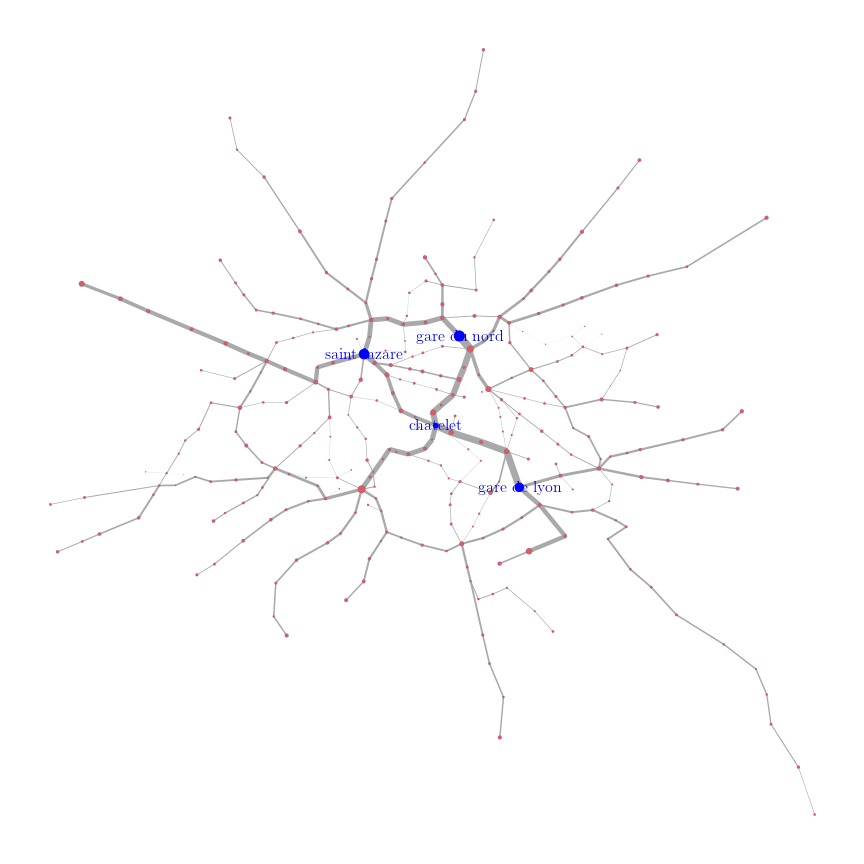

In [14]:
fig, ax = plt.subplots(1,1, figsize = (cm2inch(30),cm2inch(30)))

width_prop = 8

sns.despine(bottom = True, top = True, left = True, right = True)
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)

nx.draw_networkx_edges(graph_opt,
                       pos = pos_opt,
                       width=width_prop*flux_norm_opt/norm_flux_opt,
                       edge_color='darkgray',
                       style='solid')
node_tran = nx.draw_networkx_nodes(graph_opt,
                                   pos = pos_opt,
                                   nodelist = transit_list_opt,
                                   node_shape='o',
                                   node_color = 'C2',
                                   node_size = 5,
                                   linewidths = 0.1)
node_comm = nx.draw_networkx_nodes(graph_dyn,
                                   pos = pos_dyn,
                                   nodelist = comm_list,
                                   node_shape='o',
                                   node_color = 'C3',
                                   node_size = node_sizes,
                                   linewidths = 0.1)

nx.draw_networkx_labels(graph_dyn,pos_dyn,hubs_label,font_size=16,font_color='b')
nx.draw_networkx_nodes(graph_dyn,pos = pos_opt,nodelist = list(hubs_label.keys()),node_shape='o',node_color = 'b',
                                   node_size = node_size_hubs)

if node_tran:
    node_tran.set_edgecolor(brightness_color('C0', 1.4))
node_comm.set_edgecolor(brightness_color('C1', 1.4))

plt.show(True)